## Factors Of Happiness

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pprint import pprint
import seaborn as sns

# import gmaps
# import os

# # Import API key
# from api_keys import g_key

# # # Access maps with unique API key
# gmaps.configure(api_key=g_key)

In [2]:
# Pull CSV Files
happiness_path = "Resources/DataPanelWHR2021C2.csv"
mortality_path = "Resources/MortalityDataWHR2021C2.csv"
regions_path = "Resources/All Countries/all.csv"

# Read CSV - Create Dataframes
happy_df = pd.read_csv(happiness_path, parse_dates=['year'])
happy_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
death_df = pd.read_csv(mortality_path)
#death_df.head()
death_df['Country name'].sort_values(ascending=True)
death_df

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.220
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Yemen,29825968.0,29161922.0,2.045,20.3,0,1.005,8.966,0,0,0.267,36.71,NaN,NaN,NaN,NaN,NaN
162,Kosovo,1932774.0,1794248.0,68.916,35.0,0,3.134,9.015,0,1,0.169,29.01,8738.0,8866.0,9552.0,11108.0,110.329
163,Somaliland region,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,North Cyprus,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0.305,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
regions_df = pd.read_csv(regions_path)
regions_df = regions_df.rename(columns={'name': 'Country name'}) 

regions_df.head()

,Country name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [5]:
# Combine the data into a single dataset
happy_region_df =  pd.merge(happy_df, regions_df,
                                 how='left', on='Country name')

In [6]:
happy_region_df.keys()

#clean_happy_region_df = {[

# #(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
#        'Social support', 'Healthy life expectancy at birth',
#        'Freedom to make life choices', 'Generosity',
#        'Perceptions of corruption', 'Positive affect', 'Negative affect',
#        'alpha-2', 'alpha-3', 'country-code', 'region',
#        'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
#        'intermediate-region-code'],
#       dtype='object')

sort=happy_region_df['year']
# .drop_duplicates()
sort.value_counts()

list_2020_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2020-01-01"])

# list_2020_countries['year'] =""
# list_2020_countries['Life Ladder'] = ""
# list_2020_countries['Log GDP per capita'] = ""
# list_2020_countries['Social support'] = ""
# list_2020_countries['Healthy life expectancy at birth'] = ""
# list_2020_countries['Freedom to make life choices', 'Generosity'] = ""
# list_2020_countries['Perceptions of corruption'] = ""
# list_2020_countries['Positive affect'] = ""
# list_2020_countries['Negative affect'] = ""
# list_2020_countries['alpha-2'] = ""
# list_2020_countries['alpha-3'] = ""
# list_2020_countries['Pcountry-code'] = ""
# list_2020_countries['region'] = "" 
# list_2020_countries['sub-region'] = ""                     
# list_2020_countries['intermediate-region'] = ""
# list_2020_countries['region-code'] = ""                    
# list_2020_countries['sub-region-code'] = ""
# list_2020_countries['intermediate-region-code'] = ""

list_2020_countries
list_2020_data_df =  pd.merge(list_2020_countries, happy_region_df,
                                 how='left', on='Country name')
list_2020_data_df
list_2011_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2011-01-01"])
list_2011_countries
list_2011_data =  pd.merge(list_2011_countries, list_2020_data_df,
                                 how='left', on='Country name')
list_2013_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2013-01-01"])
list_2013_countries
list_2013_data =  pd.merge(list_2013_countries, list_2011_data,
                                 how='left', on='Country name')
list_2019_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2019-01-01"])
list_2019_countries
list_2019_data =  pd.merge(list_2019_countries, list_2013_data,
                                 how='left', on='Country name')
list_2014_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2014-01-01"])
list_2014_countries
list_2014_data =  pd.merge(list_2014_countries, list_2019_data,
                                 how='left', on='Country name')
list_2018_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2018-01-01"])
list_2018_countries
final_data_df =  pd.merge(list_2018_countries, list_2014_data,
                                 how='left', on='Country name')
# # list_2011_count
final_data_df = final_data_df.loc[final_data_df["year"] > '2010-01-01']
# final_data_df = final_data_df['year'].value_counts()
# final_data_df.sort_values()

In [7]:
happy_region_death_df =  pd.merge(final_data_df, death_df,
                                 how='left', on='Country name')

In [8]:
happy_region_death_df1 = happy_region_death_df[['Country name', 'year', 'Life Ladder', 'Population 2020','COVID-19 deaths per 100,000 population in 2020', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect','region',
       'sub-region']]

In [9]:
final_data_df1=final_data_df[['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect','region',
       'sub-region']]

In [10]:
happy_region_death_df1_drop= happy_region_death_df1.dropna()
final1_drop=final_data_df1.dropna()
final1_drop_range=final1_drop.loc[final1_drop["year"] > '2018-01-01']
happy_region_death_df1_drop_1920 = happy_region_death_df1_drop.loc[happy_region_death_df1_drop["year"] > '2019-01-01']

In [11]:
final_data_df['Log GDP per capita']= final_data_df['Log GDP per capita'].astype(float)
final_data_df['Life Ladder'] = final_data_df['Life Ladder'].astype(float)
#notnull_final = final_data_df.notnull(final_data_df['Log GDP per capita']) 
# drop_na=final_data_df.dropna(0)
# not_na=final_data_df.notna()
# nan_df
population_dead= (happy_region_death_df1_drop_1920['COVID-19 deaths per 100,000 population in 2020']*happy_region_death_df1_drop_1920['Population 2020'])/100000
happy_region_death_df1_drop_1920['COVID-19 Death percentage in 2020']= (population_dead/happy_region_death_df1_drop_1920['Population 2020'])*100
happy_region_death_df1_drop_1920['COVID-19 Death percentage in 2020'].max()

C:\Users\Owner\AppData\Local\Temp/ipykernel_27336/1996968943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_region_death_df1_drop_1920['COVID-19 Death percentage in 2020']= (population_dead/happy_region_death_df1_drop_1920['Population 2020'])*100


0.168496

In [12]:
happy_region_death_df1_drop_1920


,Country name,year,Life Ladder,Population 2020,"COVID-19 deaths per 100,000 population in 2020",Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,sub-region,COVID-19 Death percentage in 2020
9,Albania,2020-01-01,5.365,2877800.0,41.038,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265,Europe,Southern Europe,0.041038
19,Argentina,2020-01-01,5.901,45195777.0,95.684,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342,Americas,Latin America and the Caribbean,0.095684
29,Australia,2020-01-01,7.137,25499881.0,3.565,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205,Oceania,Australia and New Zealand,0.003565
39,Austria,2020-01-01,7.213,9006400.0,69.084,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206,Europe,Western Europe,0.069084
49,Bangladesh,2020-01-01,5.280,164689383.0,4.590,8.472,0.739,65.3,0.777,-0.009,0.742,0.582,0.332,Asia,Southern Asia,0.004590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Uganda,2020-01-01,4.641,45741000.0,0.549,7.684,0.800,56.5,0.687,0.147,0.878,0.699,0.425,Africa,Sub-Saharan Africa,0.000549
729,Ukraine,2020-01-01,5.270,43733759.0,44.087,9.428,0.885,65.2,0.784,0.126,0.946,0.688,0.285,Europe,Eastern Europe,0.044087
769,Uruguay,2020-01-01,6.310,3473727.0,5.210,9.937,0.921,69.2,0.908,-0.084,0.491,0.807,0.265,Americas,Latin America and the Caribbean,0.005210
789,Zambia,2020-01-01,4.838,18383956.0,2.110,8.117,0.767,56.3,0.750,0.056,0.810,0.691,0.345,Africa,Sub-Saharan Africa,0.002110


The r-value is: 0.25856693460727104


5.711701558938016

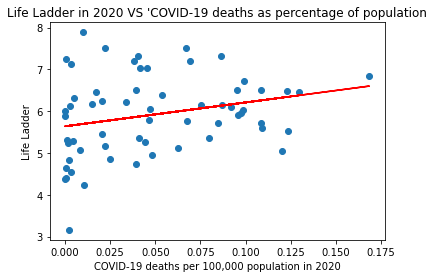

In [17]:
x_values = happy_region_death_df1_drop_1920['COVID-19 Death percentage in 2020']
y_values = happy_region_death_df1_drop_1920['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Life Ladder in 2020 VS 'COVID-19 deaths as percentage of population")
plt.xlabel('COVID-19 deaths per 100,000 population in 2020')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs COVID deaths in 2020 %.png");
slope


In [24]:
happy_region_death_df1_drop_1920.corr()
final1_drop_range.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.808569,0.746061,0.772596,0.506277,0.020124,-0.606632,0.350601,-0.537522
Log GDP per capita,0.808569,1.000000,0.750494,0.893839,0.284073,-0.205271,-0.491028,0.127126,-0.516603
Social support,0.746061,0.750494,1.000000,0.658437,0.271906,-0.046369,-0.284183,0.239630,-0.591321
Healthy life expectancy at birth,0.772596,0.893839,0.658437,1.000000,0.298822,-0.213316,-0.403786,0.142281,-0.367722
Freedom to make life choices,0.506277,0.284073,0.271906,0.298822,1.000000,0.202179,-0.535176,0.594643,-0.328664
Generosity,0.020124,-0.205271,-0.046369,-0.213316,0.202179,1.000000,-0.125044,0.189412,0.008258
Perceptions of corruption,-0.606632,-0.491028,-0.284183,-0.403786,-0.535176,-0.125044,1.000000,-0.350145,0.411465
Positive affect,0.350601,0.127126,0.239630,0.142281,0.594643,0.189412,-0.350145,1.000000,-0.311537
Negative affect,-0.537522,-0.516603,-0.591321,-0.367722,-0.328664,0.008258,0.411465,-0.311537,1.000000


## Correlation

The r-value is: 0.8085688578099486


0.9035628966551741

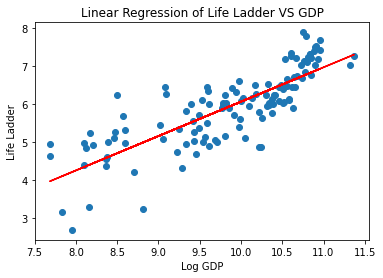

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
x_values = final1_drop_range['Log GDP per capita']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS GDP")
plt.xlabel('Log GDP')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs GDP.png")
slope

The r-value is: 0.7460606394362244


6.9579476201138615

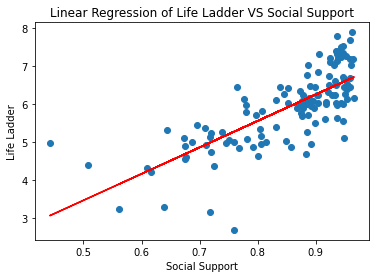

In [16]:
x_values = final1_drop_range['Social support']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Social Support")
plt.xlabel('Social Support')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs social support.png")
slope

The r-value is: 0.7725958455886166


0.14136738622660508

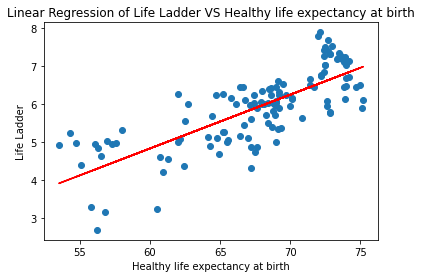

In [19]:
x_values = final1_drop_range['Healthy life expectancy at birth']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Healthy life expectancy at birth")
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs healthy life expectancy.png")
slope

The r-value is: 0.5062768156984123


5.4167126284658575

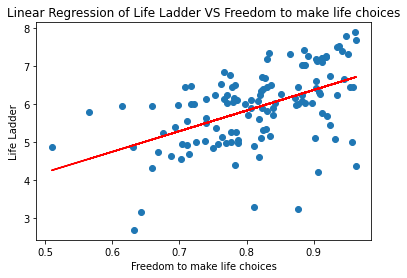

In [31]:
x_values = final1_drop_range['Freedom to make life choices']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Freedom to make life choices")
plt.xlabel('Freedom to make life choices')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs freedom to make choices.png")
slope

The r-value is: 0.02012365002471333


0.15263316307366442

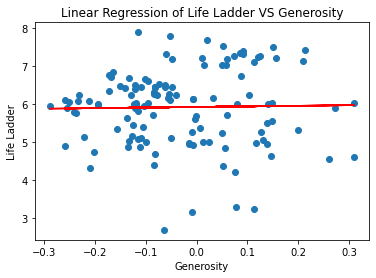

In [20]:
x_values = final1_drop_range['Generosity']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Generosity")
plt.xlabel('Generosity')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs generosity.png")
slope

The r-value is: -0.6066323095134318


-3.0179434597816233

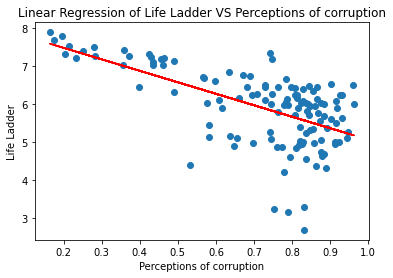

In [25]:
x_values = final1_drop_range['Perceptions of corruption']
y_values =final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Perceptions of corruption")
plt.xlabel('Perceptions of corruption')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/LL vs perceptions of corruption.png")
slope

The r-value is: 0.3506005018219214


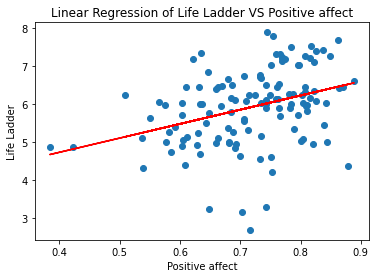

In [26]:
x_values = final1_drop_range['Positive affect']
y_values = final1_drop_range['Life Ladder']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Linear Regression of Life Ladder VS Positive affect")
plt.xlabel('Positive affect')
plt.ylabel('Life Ladder')
#plt.savefig("../output_data/north_temp_vs_lat.png")
print(f"The r-value is: {rvalue}")
#plt.show()
plt.savefig("Images/LL vs positive affect.png")

In [35]:
dates_df= final_data_df.groupby(['sub-region',]).mean()
#dates_df.reset_index(inplace=True)
#dates_df.head(19)
dates_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country-code,region-code,sub-region-code,intermediate-region-code
sub-region,,,,,,,,,,,,,
Australia and New Zealand,7.272450,10.690850,0.946800,72.915000,0.926650,0.252150,0.333500,0.814350,0.198500,295.000000,9.0,53.0,NaN
Central Asia,5.451167,8.845200,0.861167,63.300000,0.807852,-0.008867,0.774067,0.716167,0.185600,525.666667,142.0,143.0,NaN
Eastern Asia,5.469633,9.782000,0.874300,68.353333,0.788519,-0.072345,0.777350,0.751467,0.179333,348.000000,142.0,30.0,NaN
Eastern Europe,5.381020,10.021920,0.903340,66.768000,0.688680,-0.111360,0.897500,0.679440,0.237500,514.200000,150.0,151.0,NaN
Latin America and the Caribbean,6.215056,9.670300,0.860000,67.294444,0.814167,-0.093966,0.754867,0.817700,0.293789,269.555556,19.0,419.0,9.444444
Northern Africa,4.489500,9.271100,0.695600,63.680000,0.615200,-0.174500,0.842812,0.548450,0.358800,803.000000,2.0,15.0,NaN
Northern America,7.312100,10.768100,0.930000,73.140000,0.925700,0.202400,0.416300,0.839700,0.259100,124.000000,19.0,21.0,NaN
Northern Europe,6.706200,10.648171,0.931557,69.712857,0.834371,0.002529,0.498757,0.738914,0.209600,382.714286,150.0,154.0,NaN
South-eastern Asia,5.323733,8.941433,0.812867,62.950000,0.915333,0.153967,0.831897,0.825633,0.310667,496.000000,142.0,35.0,NaN


In [36]:
sub_region=['Australia and New Zealand','Central Asia','Eastern Asia',
            'Eastern Europe','Latin America and the Caribbean','Northern Africa',
            'Northern America','Northern Europe','South-eastern Asia','Southern Europe',
            'Sub-Saharan Africa','Western Asia','Western Europe']

In [37]:
aus_new= final_data_df.loc[final_data_df["sub-region"] == "Australia and New Zealand", :]
centra_asia= final_data_df.loc[final_data_df["sub-region"] == "Central Asia", :]
east_asia= final_data_df.loc[final_data_df["sub-region"] == 'Eastern Asia', :]
east_europe= final_data_df.loc[final_data_df["sub-region"] == 'Eastern Europe', :]
l_america= final_data_df.loc[final_data_df["sub-region"] == 'Latin America and the Caribbean', :]
n_america= final_data_df.loc[final_data_df["sub-region"] == 'Northern America', :]
n_africa= final_data_df.loc[final_data_df["sub-region"] == 'Northern Africa', :]
n_europe= final_data_df.loc[final_data_df["sub-region"] == 'Northern Europe', :]
se_asia= final_data_df.loc[final_data_df["sub-region"] == 'South-eastern Asia', :]
s_europe= final_data_df.loc[final_data_df["sub-region"] == 'Southern Europe', :]
ss_africa= final_data_df.loc[final_data_df["sub-region"] == 'Sub-Saharan Africa', :]
w_asia= final_data_df.loc[final_data_df["sub-region"] == 'Western Asia', :]
w_europe= final_data_df.loc[final_data_df["sub-region"] == 'Western Europe', :]

aus_new_year= aus_new.groupby(['year']).mean()
centra_asia_year= centra_asia.groupby(['year']).mean()
east_asia_year= east_asia.groupby(['year']).mean()
east_europe_year= east_europe.groupby(['year']).mean()
l_america_year= l_america.groupby(['year']).mean()
n_america_year= n_america.groupby(['year']).mean()
n_africa_year= n_africa.groupby(['year']).mean()
n_europe_year= n_europe.groupby(['year']).mean()
se_asia_year= se_asia.groupby(['year']).mean()
s_europe_year= s_europe.groupby(['year']).mean()
ss_africa_year= ss_africa.groupby(['year']).mean()
w_asia_year= w_asia.groupby(['year']).mean()
w_europe_year= w_europe.groupby(['year']).mean()

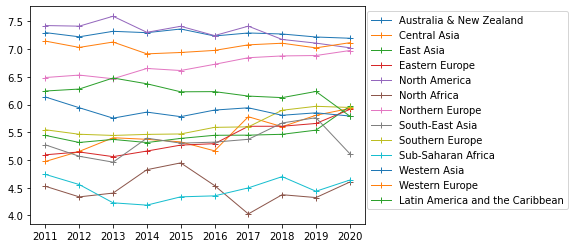

In [38]:
x_axis = np.arange(1,11,1)
plt.plot(x_axis, aus_new_year['Life Ladder'], marker="+",linewidth=1, label="Australia & New Zealand")
plt.plot(x_axis, centra_asia_year['Life Ladder'], marker="+", linewidth=1, label="Central Asia")
plt.plot(x_axis, east_asia_year['Life Ladder'], marker="+", linewidth=1, label="East Asia")
plt.plot(x_axis, east_europe_year['Life Ladder'], marker="+", linewidth=1, label="Eastern Europe")
plt.plot(x_axis, n_america_year['Life Ladder'], marker="+", linewidth=1, label="North America")
plt.plot(x_axis, n_africa_year['Life Ladder'], marker="+", linewidth=1, label="North Africa")
plt.plot(x_axis, n_europe_year['Life Ladder'], marker="+", linewidth=1, label="Northern Europe")
plt.plot(x_axis, se_asia_year['Life Ladder'], marker="+", linewidth=1, label="South-East Asia")
plt.plot(x_axis, s_europe_year['Life Ladder'], marker="+", linewidth=1, label="Southern Europe")
plt.plot(x_axis, ss_africa_year['Life Ladder'], marker="+", linewidth=1, label="Sub-Saharan Africa")
plt.plot(x_axis, w_asia_year['Life Ladder'], marker="+", linewidth=1, label="Western Asia")
plt.plot(x_axis, w_europe_year['Life Ladder'], marker="+", linewidth=1, label="Western Europe")
plt.plot(x_axis, l_america_year['Life Ladder'], marker="+", linewidth=1, label="Latin America and the Caribbean")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['2011','2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
plt.legend(bbox_to_anchor=(1.62, 1),loc ='upper right');
plt.savefig("Images/combined.png", bbox_inches='tight')